In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
path_to_excel = Path('../data/JoIE_article/supporting information S2.xlsx')

## Global warming

In [3]:
lca_contr_rel_r = pd.read_excel(path_to_excel,sheet_name='Table S1 - gw_relative')
lca_contr_diff = pd.read_excel(path_to_excel,sheet_name='Table S2 - gw_absolute')

In [4]:
lca_contr_diff.head(3)

,week,classification,iteration,gw improvement
0,16,additive,0,3.284867
1,48,additive,5296,1.533067
2,48,additive,5297,1.533067


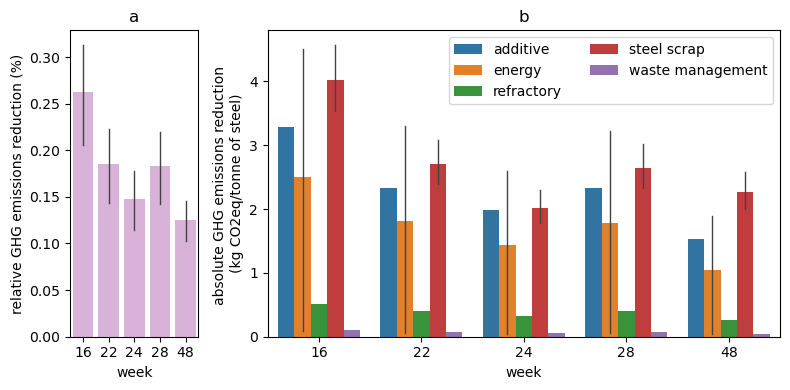

In [5]:
f,(a1,a2) = plt.subplots(ncols=2,nrows=1,figsize=(8,4),gridspec_kw={'width_ratios': [1, 4]})

sns.barplot(
data=lca_contr_rel_r.pivot_table(index=['week','iteration'],
                                 values='gw improvement',aggfunc='sum').reset_index(),
x='week',y='gw improvement',errorbar='pi',estimator='median',ax=a1,errwidth=1,
facecolor=(0.5, 0, 0.5, 0.3),)

sns.barplot(
    x='week',
    hue='classification',
    y='gw improvement',
    data=lca_contr_diff,
    errorbar='pi',estimator='median',ax=a2,
errwidth=1)

a1.set_ylabel('relative GHG emissions reduction (%)');
a2.set_ylabel('absolute GHG emissions reduction \n(kg CO2eq/tonne of steel)')
a2.legend(ncol=2)
a1.set_title('a')
a2.set_title('b')
plt.tight_layout()

plt.savefig('gw_scores_combined.png',dpi=600)

## life cycle costs ($)

In [6]:
lcc_contr_absolute = pd.read_excel(path_to_excel,sheet_name='Table S4 - lcc_absolute')
lcc_contr_relative  = pd.read_excel(path_to_excel,sheet_name='Table S3 - lcc_relative')

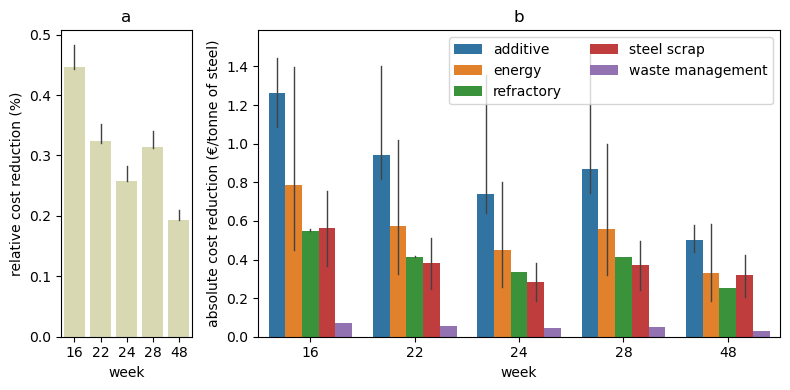

In [7]:
f,(a1,a2) = plt.subplots(ncols=2,nrows=1,figsize=(8,4),gridspec_kw={'width_ratios': [1, 4]})

sns.barplot(x='week',y='cost',data=lcc_contr_relative,errorbar='pi',estimator='median',
facecolor=(0.5, 0.5, 0, 0.3),errwidth=1,ax=a1)

sns.barplot(
data= lcc_contr_absolute,
x='week',y='cost',hue='classification',errorbar='pi',estimator='median',
#capsize=0.1,
errwidth=1,ax=a2)

a1.set_ylabel('relative cost reduction (%)');
a2.set_ylabel('absolute cost reduction (€/tonne of steel)')
a2.legend(ncol=2)
a1.set_title('a')
a2.set_title('b')

plt.tight_layout()

plt.savefig('lcc_scores_combined.png',dpi=600)

## sensitivity analysis

In [8]:
# for consistent colour display
contr_order_dict = {'waste management':4,'steel scrap':3,'refractory':2,
                    'energy':1,'additive':0}

In [9]:
sensitivity = pd.read_excel(path_to_excel,sheet_name='Table S5 - sensitivity')

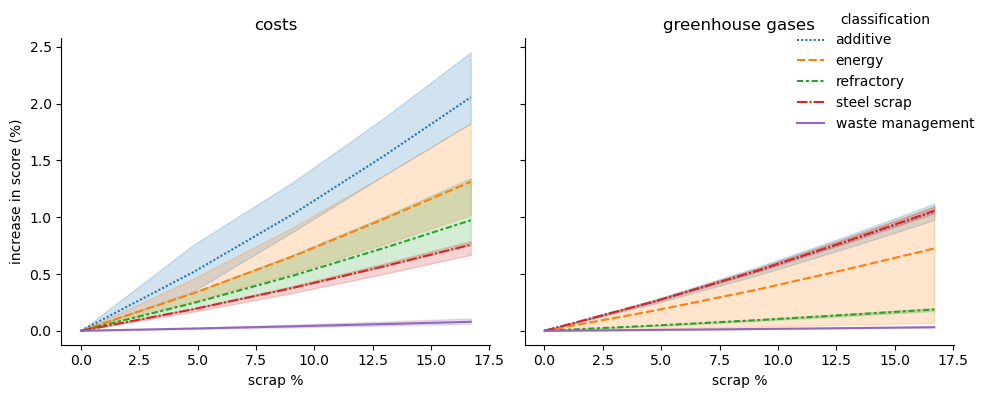

In [10]:
g = sns.relplot(x='scrap %',y='score',hue='classification',col='indicator',
            estimator='median',
            data=sensitivity[sensitivity['scrap %']<17],
            kind='line',errorbar='pi',
            hue_order=reversed(contr_order_dict.keys()),
            style='classification',height=4
            );

sns.move_legend(g,'upper right')
g.axes[0][0].set_ylabel('increase in score (%)')
g.axes[0][0].set_title('costs')
g.axes[0][1].set_title('greenhouse gases')

plt.tight_layout()


plt.savefig('sensitivity_scenario.png',dpi=600)

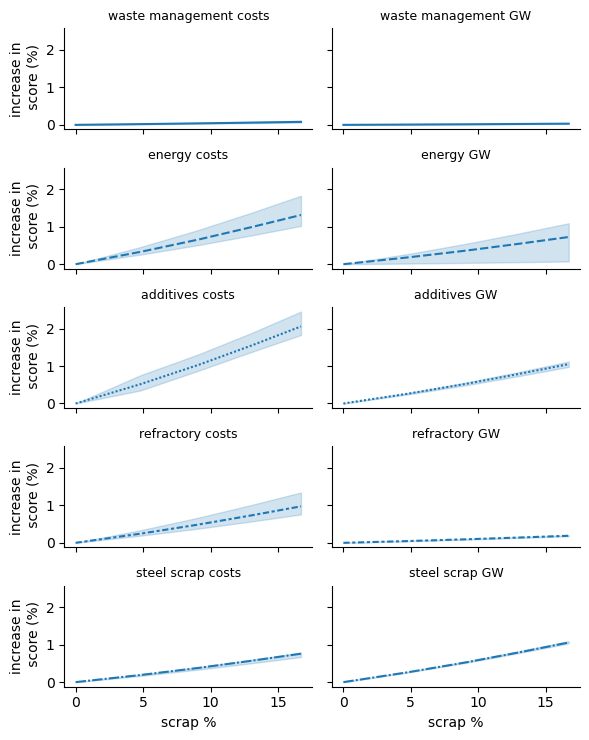

In [11]:
g = sns.relplot(x='scrap %',y='score',row='classification',col='indicator',
            estimator='median',
            data=sensitivity[sensitivity['scrap %']<17],
            kind='line',errorbar='pi',
            hue_order=reversed(contr_order_dict.keys()),
            style='classification',height=1.5,aspect=2,legend=False,
            );

#sns.move_legend(g,'upper right')
g.axes[0][0].set_ylabel('increase in\n score (%)',)
g.axes[1][0].set_ylabel('increase in\n score (%)')
g.axes[2][0].set_ylabel('increase in\n score (%)')
g.axes[3][0].set_ylabel('increase in\n score (%)')
g.axes[4][0].set_ylabel('increase in\n score (%)')

g.axes[0][0].set_title('waste management costs',fontsize=9)
g.axes[0][1].set_title('waste management GW',fontsize=9)

g.axes[1][0].set_title('energy costs',fontsize=9)
g.axes[1][1].set_title('energy GW',fontsize=9)

g.axes[2][0].set_title('additives costs',fontsize=9)
g.axes[2][1].set_title('additives GW',fontsize=9)

g.axes[3][0].set_title('refractory costs',fontsize=9)
g.axes[3][1].set_title('refractory GW',fontsize=9)

g.axes[4][0].set_title('steel scrap costs',fontsize=9)
g.axes[4][1].set_title('steel scrap GW',fontsize=9)

plt.tight_layout()